# MLP

In [10]:
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import nltk
import re
import pandas as pd

params = [{'solver': 'sgd', 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'hidden_layer_sizes':(100,)},
          {'solver': 'sgd', 'learning_rate': 'constant', 'learning_rate_init': 0.25, 'hidden_layer_sizes':(50,)}]

labels = ["constant learning-rate 0.01", 
                "constant learning-rate 0.25"]


# construção do modelo mlp


learning on dataset  twitter
  (0, 9089)	1
  (0, 21409)	1
  (0, 25641)	1
  (0, 38460)	1
  (0, 20506)	1
  (0, 3093)	1
  (0, 34703)	1
  (0, 14483)	1
  (0, 5763)	1
  (0, 23027)	1
  (0, 6281)	1
  (0, 21408)	1
  (0, 25495)	1
  (0, 38449)	1
  (0, 20464)	1
  (0, 3092)	1
  (0, 34702)	1
  (0, 13923)	1
  (0, 5762)	1
  (1, 7421)	1
  (1, 20064)	1
  (1, 26095)	1
  (1, 38461)	1
  (1, 4201)	1
  (1, 20005)	1
  :	:
  (8198, 37317)	1
  (8198, 14054)	1
  (8198, 5607)	1
  (8198, 32784)	1
  (8198, 33086)	1
  (8198, 32783)	1
  (8198, 37313)	1
  (8198, 14473)	1
  (8198, 33846)	1
  (8198, 31223)	1
  (8198, 36102)	1
  (8198, 36100)	1
  (8198, 34693)	1
  (8198, 16922)	1
  (8198, 34690)	1
  (8198, 24457)	1
  (8198, 31217)	1
  (8198, 33836)	1
  (8198, 16666)	1
  (8198, 21409)	1
  (8198, 25641)	1
  (8198, 6281)	1
  (8198, 21408)	1
  (8198, 25495)	1
  (8198, 13923)	2
[<5739x40602 sparse matrix of type '<class 'numpy.int64'>'
	with 178975 stored elements in Compressed Sparse Row format>, <2460x40602 sparse matrix o

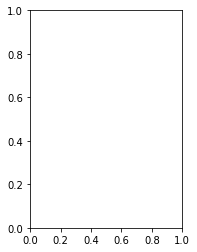

In [50]:
def plot_on_dataset(X, y, name, X_test, y_test):
    
    # scale inputs
    X = MinMaxScaler().fit_transform(X)
    
    mlps = []
    max_iter = 1000
    
    #train set
    for label, param in zip(labels, params):
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    # plot training stats
    for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.loss_curve_, label=label, **args)

        
#reading dataset
dataset = pd.read_csv('Tweets_Mg.csv',encoding='utf-8')
tweets = dataset['Text'].values
classes = dataset['Classificacao'].values
vectorizer = CountVectorizer(ngram_range=(1,2))
freq_tweets = vectorizer.fit_transform(tweets)

data_sets = ["twitter",   freq_tweets,   classes]

print("\nlearning on dataset ", data_sets[0])
print (freq_tweets)
# split dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_sets[1], data_sets[2], test_size=0.3, random_state=12345)
print(model_selection.train_test_split(data_sets[1], data_sets[2], test_size=0.3, random_state=12345))
plt.subplot(1, 2, 1)


fig.legend( labels, ncol=3, loc="upper center")
plt.show()

# média de accuracy como medidas de teste

In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)
metrics.accuracy_score(classes,resultados)

sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))